In [54]:
import numpy as np

In [61]:
class Perceptron:
    """
    Perceptron: Linear model classifier
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    Parameters
    ~~~~~~~~~~
    eta : float
        Learning rate, value in range [0,1]
    n_iter : int
        Number of passes over the training data (epochs)
    random_state : int
        Random seed value for initializations

    Attributes
    ~~~~~~~~~~
    weights_ : array-like
        Weights obtained after fitting
    bias_ : Scalar
        Bias unit obtained after fitting
    errors_ : array-like
        Number of misclassification errors in each epoch
    """
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Train data
        
        Parameters
        ~~~~~~~~~~
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of  examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        ~~~~~~~
        self : object
        """
        rand_gen = np.random.RandomState(self.random_state)
        self.weights_ = rand_gen.normal(loc=0.0, scale=0.01,
                                        size=X.shape[1]) # select num of features
        self.bias_ = np.float64(0.0)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y): # loop over features, target
                update = self.eta * (yi - self.predict(xi))
                self.weights_ += update * xi
                self.bias_ += update
                errors += 1 if update != 0 else 0
            self.errors_.append(errors)
        
        return self
    
    def predict(self, X):
        """
        Return class label after unit step
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        """
        Calculate net input
        """
        return np.dot(X, self.weights_) + self.bias_

        
        
    

Now test my perceptron

In [56]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [57]:
df.groupby('target_name')['target_name'].describe()

,count,unique,top,freq
target_name,,,,
setosa,50,1,setosa,50
versicolor,50,1,versicolor,50
virginica,50,1,virginica,50


In [58]:
# select only setosa and versicolor (to test a binary classification)
y = df[df['target_name'].isin(['setosa', 'versicolor'])]['target']

#  keep sepal length and petal length
X = df[['sepal length (cm)', 'petal length (cm)']].loc[y.index]
X.tail()

,sepal length (cm),petal length (cm)
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0
99,5.7,4.1


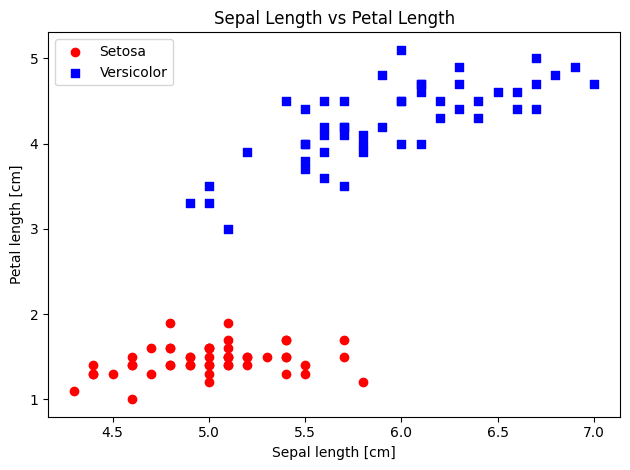

In [59]:
import matplotlib.pyplot as plt 

plt.scatter(X['sepal length (cm)'].iloc[y[y==0].index],
            X['petal length (cm)'].iloc[y[y==0].index], color='red', marker='o', label='Setosa')
plt.scatter(X['sepal length (cm)'].iloc[y[y==1].index],
            X['petal length (cm)'].iloc[y[y==1].index], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend()
plt.title("Sepal Length vs Petal Length")
plt.tight_layout()

Text(0, 0.5, 'Number of updates')

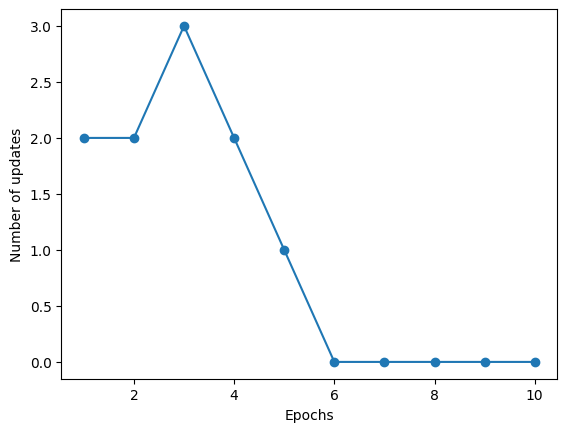

In [66]:
perceptron = Perceptron(eta=0.01, n_iter=10, random_state=1310)
perceptron.fit(X.values, y.values)

plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

It converged in the sixth epoch.